In [1]:
import torch
import matplotlib.pyplot as plt
import math

In [2]:
relu = torch.nn.ReLU()

def f(x):
    y = relu(x)  # 1/(1+(e**(1)))
    return y

x = torch.linspace(-2, 2, 1000, device=torch.device("cpu"), dtype=torch.float32)
y = f(x)

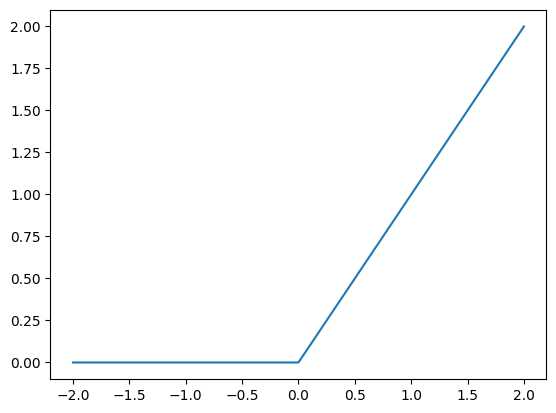

In [3]:
plt.plot(x.numpy(), y.numpy())
plt.show()

In [4]:
class Fourier(torch.nn.Module):
    def __init__(self, n):
        super().__init__()
        self.n = n
        self.a0 = torch.nn.Parameter(torch.tensor(0, dtype=torch.float32))
        self.an = torch.nn.Parameter(torch.randn(n, 1, dtype=torch.float32))
        self.bn = torch.nn.Parameter(torch.ones(n, 1, dtype=torch.float32))
        
    def forward(self, x):
        n, x = torch.arange(1, self.n+1).view(self.n, 1), x.view(1, x.size()[0])
        nx = torch.mul(n, x)
        sine = torch.sin(nx)
        cosine = torch.cos(nx)
        fourx = self.a0 + torch.sum(torch.mul(self.an, cosine).T, 1) + torch.sum(torch.mul(self.bn, sine).T, 1)
        return fourx

fourier_layer = Fourier(18)

In [5]:
loss_fn = torch.nn.MSELoss(reduction="sum")
optimizer = torch.optim.SGD(fourier_layer.parameters(), lr=1e-4)

In [9]:
for t in range(50):
    y_pred = fourier_layer(x)
    loss = loss_fn(y_pred, y)
    
    if t%50 == 0:
        print(loss, "\n")
        
    fourier_layer.zero_grad()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(loss)

tensor(0.2475, grad_fn=<MseLossBackward0>) 

tensor(0.0553, grad_fn=<MseLossBackward0>)


In [10]:
a0_value = fourier_layer.a0.tolist()
an_values = fourier_layer.an.tolist()
bn_values = fourier_layer.bn.tolist()

print("a0:", a0_value)
print("an:", an_values)
print("bn:", bn_values)

a0: 0.1486608386039734
an: [[0.3799764811992645], [-0.394194632768631], [-0.3176462650299072], [0.5885122418403625], [-0.5578607320785522], [0.2291022390127182], [0.04599751904606819], [-0.14626680314540863], [0.02034737542271614], [0.15566593408584595], [-0.25381577014923096], [0.1875348538160324], [-0.029364265501499176], [-0.1302274465560913], [0.19865699112415314], [-0.17952780425548553], [0.10676717758178711], [-0.04234936088323593]]
bn: [[0.660868763923645], [0.023680301383137703], [-0.16536474227905273], [0.08445484936237335], [0.036439210176467896], [-0.08286431431770325], [0.0409720353782177], [0.028046488761901855], [-0.05724288150668144], [0.02928723581135273], [0.020867014303803444], [-0.04624418914318085], [0.029006024822592735], [0.011276657693088055], [-0.04158010706305504], [0.044418804347515106], [-0.02689015492796898], [0.007655375637114048]]


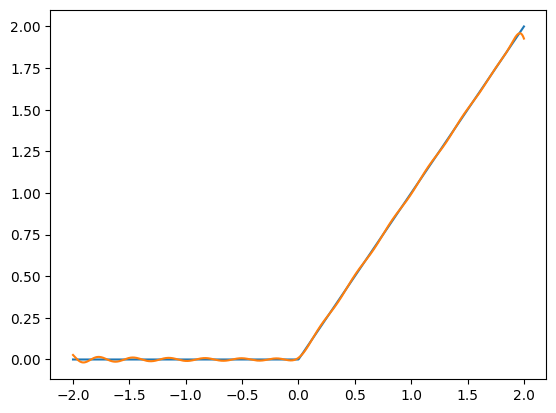

In [15]:
x_np, y_np = x.numpy(), y.numpy()
ypred_np = y_pred.detach().numpy()
plt.plot(x_np, y_np)
plt.plot(x_np, ypred_np)
plt.show()